# Statistics Exercise 1: Considering Correlation

In this exercise we will explore how to use measures of correlation to measure the relation between different features in a dataset.

## Part 1: Generating Data

We will start by generating synthetic data as a test case for measuring correlation.

**Questions:**
  1. Create a variable X and assign to it a NumPy array containing 200 numbers spaced uniformly between -1 and 1, so X contains (-1, -0.99, -0.98, ..., 0.99, 1). Set Y = 2 * X. Hint: You may use the function np.arange.
  2. Write a function noise_var(v) which receives a NumPy array and adds to it each element samples from a normal random variable with mean 0 and variance 0.01. Set X2 = noise_var(X) and Y2 = noise_var(Y). Hint: use np.random.normal.
  3. What is the Pearson correlation coefficient of X2 and Y2? Does the number you find make sense, and what does this value mean? Hint: NumPy has a function to calculate this.
  4. Plot X2 and Y2 using a scatterplot, and explain how the value you found in (4) can be seen in the plot.

In [160]:
import numpy as np
#1.Create a variable X and assign to it a NumPy array containing 200 numbers 
# spaced uniformly between -1 and 1, so X contains (-1, -0.99, -0.98, ..., 0.99, 1). 
# Set Y = 2 * X. Hint: You may use the function np.arange.
X = np.random.uniform(-1,1,200)
print(X,'\n')
Y =2 * X
print(Y)

[-0.21383705 -0.49171788  0.10066297  0.91821058  0.1968716  -0.24429384
 -0.46914809  0.41611203 -0.67687874 -0.56878604  0.21281198  0.57311253
  0.38377306 -0.93352085 -0.99674926 -0.78454963  0.7063295   0.53498489
  0.89916148 -0.75004385 -0.55200722 -0.38313314  0.84558791 -0.23810057
  0.19528752 -0.74174976 -0.64282698  0.58147461 -0.20522428  0.62714632
  0.09470525  0.75895025  0.65349254 -0.21826936  0.75690075 -0.42937577
 -0.36552691  0.14263478 -0.07027117 -0.13511202  0.33246295 -0.26840645
 -0.03035569 -0.61929845 -0.78085469 -0.28375355  0.53220445 -0.09876258
 -0.75409845 -0.23696868 -0.0442613  -0.96378252  0.05916797  0.02121365
 -0.62231472  0.51170791  0.90849506 -0.15969194  0.66555575 -0.19015452
  0.20003111 -0.10378326  0.0679186   0.7046777  -0.78945479  0.04096543
 -0.21229477  0.43021563 -0.21374477  0.506226   -0.36475454 -0.75485654
 -0.20104798  0.57678345 -0.5632145   0.33481985 -0.37548105 -0.49993981
 -0.09746423  0.45442352 -0.88140733 -0.02637258 -0

In [161]:
#2.Write a function noise_var(v) which receives a NumPy array and adds to it each 
# element samples from a normal random variable with mean 0 and variance 0.01. 
# Set X2 = noise_var(X) and Y2 = noise_var(Y). Hint: use np.random.normal.

def noise_var(v):
    return v + np.random.normal(0,0.01, len(v)) 

X2 = noise_var(X)
Y2 = noise_var(Y)
print(X2,'\n')
print(Y2)

[-0.21002635 -0.49655055  0.10960992  0.90821708  0.20459009 -0.2506859
 -0.47275218  0.42446969 -0.66831072 -0.57172544  0.19979826  0.57913709
  0.37682617 -0.92987162 -1.00746618 -0.78728939  0.69016259  0.52784199
  0.90714257 -0.75222577 -0.54762331 -0.37989484  0.8464649  -0.24266992
  0.19396334 -0.74430779 -0.63520869  0.59513732 -0.19798174  0.62423642
  0.09001258  0.76862159  0.64011107 -0.19417089  0.77149268 -0.444652
 -0.36900082  0.12627464 -0.06823329 -0.14569295  0.32279334 -0.25058704
 -0.03655153 -0.6103649  -0.7839442  -0.29226958  0.5388789  -0.07834509
 -0.74716137 -0.23563208 -0.05752379 -0.96915268  0.09067923  0.03049756
 -0.62463643  0.51062714  0.91000205 -0.15946243  0.67594637 -0.19731035
  0.20676989 -0.09598594  0.07889012  0.70406533 -0.80251536  0.03148881
 -0.19964388  0.43308229 -0.21009733  0.49397279 -0.36755412 -0.77104764
 -0.20625749  0.58285648 -0.57318066  0.32717882 -0.36443263 -0.49825824
 -0.10896536  0.44384504 -0.87843065 -0.01592541 -0.77

In [162]:
# 3.What is the Pearson correlation coefficient of X2 and Y2? Does the number you find make sense,
# and what does this value mean? Hint: NumPy has a function to calculate this.
Z = np.corrcoef(X2,Y2)
print('the Pearson correlation coefficient of X2 and Y2 is {}  '.format(Z[0,1]))
print('is very close to 1., it indicates a very strong positive linear relationship between variables X2 and Y2')

the Pearson correlation coefficient of X2 and Y2 is 0.9997672310455432  
is very close to 1., it indicates a very strong positive linear relationship between variables X2 and Y2


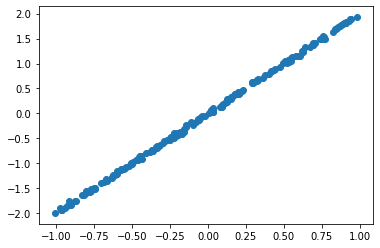

In [163]:
# 4.Plot X2 and Y2 using a scatterplot, and explain how the value you found in (4) can be seen in the plot.
import matplotlib.pyplot as plt
# As X increases, Y tends to increase, so it is a positive association
plt.scatter(X2, Y2)

# Part 2: Movie Ratings

Now let's try applying this to a real (small) dataset. Load the data in movie_rating.csv into a Pandas DataFrame. The data consists of critic ratings (column 'rating') and crowdsourced ratings (column 'people_vote')  for a set of 20 movies:

In [164]:
import pandas as pd
movies = pd.read_csv('movie_rating.csv')
movies.head()

,Unnamed: 0,people_vote,rating
0,0,60.000000,7.003429
1,1,73.812940,8.102049
2,2,87.096481,8.969485
3,3,70.698214,7.506635
4,4,71.963592,7.366683


Note that the critic ratings are on a scale from 0 to 10, while the crowdsourced ratings are on a scale from 0 to 100.

**Questions:**
  5. Use the Pandas DataFrame function describe() to view some important summary statistics for the data. What does each row in the output mean? [Click for hint](https://en.wikipedia.org/wiki/Quartile)
  6. Use the Pandas DataFrame function corr() to find the correlation between the two ratings. Does it look like they are highly correlated?
  7. Add a new column 'people_vote_normed' to the DataFrame, containing the crowdsourced ratings scaled to be between 0 and 10. What is the correlation coefficient of this column with 'rating'? Why?
  8. To explore the connection between critic ratings and people votes, plot them against each other in a scatter plot. What do you see?
  9. What is the correlation coefficient value when the outlier(s) is/are removed?

In [165]:
# 5.Use the Pandas DataFrame function describe() to view some important summary statistics for the data. 
# What does each row in the output mean? Click for hint

print(''' Quartile(25%,50%,75%) provides information the spread of the data.
 minimum, maximum, mean and standard deviation values of dataFrame and count of rows''')
movies.describe()

 Quartile(25%,50%,75%) provides information the spread of the data.
 minimum, maximum, mean and standard deviation values of dataFrame and count of rows


,Unnamed: 0,people_vote,rating
count,20.00000,20.000000,20.000000
mean,9.50000,72.551725,8.050533
std,5.91608,19.307599,0.742663
min,0.00000,0.000000,7.003429
25%,4.75000,70.503273,7.420794
50%,9.50000,72.959453,7.949311
75%,14.25000,82.685828,8.767154
max,19.00000,92.000000,9.311104


In [166]:
#6. Use the Pandas DataFrame function corr() to find the correlation between the two ratings. 
# Does it look like they are highly correlated?
 
print('''
Each of those correlation types can exist in a spectrum represented by values from 0 to 1 
where slightly or highly positive correlation features can be something like 0.5 or 0.7. 
If there is a strong and perfect positive correlation, then the result is represented by a 
correlation score value of 0.9 or 1.
If there is a strong negative correlation, it will be represented by a value of -1.

But in our case we have a week positive correlation features
''')
movies.corr(method ='pearson')


Each of those correlation types can exist in a spectrum represented by values from 0 to 1 
where slightly or highly positive correlation features can be something like 0.5 or 0.7. 
If there is a strong and perfect positive correlation, then the result is represented by a 
correlation score value of 0.9 or 1.
If there is a strong negative correlation, it will be represented by a value of -1.

But in our case we have a week positive correlation features



,Unnamed: 0,people_vote,rating
Unnamed: 0,1.000000,0.178008,0.284198
people_vote,0.178008,1.000000,0.336953
rating,0.284198,0.336953,1.000000


In [167]:
#7. Add a new column 'people_vote_normed' to the DataFrame, 
# containing the crowd sourced ratings scaled to be between 0 and 10. 
''' i will use this formula  normalized_df=10*(df-df.min())/(df.max()-df.min())'''

# What is the correlation coefficient of this column with 'rating'?
movies['people_vote_normed'] = 10*(movies['people_vote']-movies['people_vote'].
                                   min())/(movies['people_vote'].max()-movies['people_vote'].min())
print("The correlation coefficient of 'people_vote_normed' with 'rating' is {}\n".
      format(movies['people_vote_normed'].corr(movies['rating'])))
print('We still can see a weak positive correlation ')

#  Why? 
print('''Because Pearson correlation coefficient doesn't depend on scale, 
    i.e. A LINEAR change of scale does not affect the magnitude or sign of a correlation coefficient; 
    the Pearson correlation is unit free''')


The correlation coefficient of 'people_vote_normed' with 'rating' is 0.3369534647828709

We still can see a weak positive correlation 
Because Pearson correlation coefficient doesn't depend on scale, 
    i.e. A LINEAR change of scale does not affect the magnitude or sign of a correlation coefficient; 
    the Pearson correlation is unit free


In [168]:
movies

,Unnamed: 0,people_vote,rating,people_vote_normed
0,0,60.000000,7.003429,6.521739
1,1,73.812940,8.102049,8.023146
2,2,87.096481,8.969485,9.467009
3,3,70.698214,7.506635,7.684588
4,4,71.963592,7.366683,7.822130
5,5,77.324780,9.145239,8.404867
6,6,66.217744,7.305087,7.197581
7,7,76.967948,7.676270,8.366081
8,8,71.544984,7.532199,7.776629
9,9,87.737301,8.919858,9.536663


'here we can see weak correlation between critic ratings and people votes \n    and one outlier also became visible on the plot'

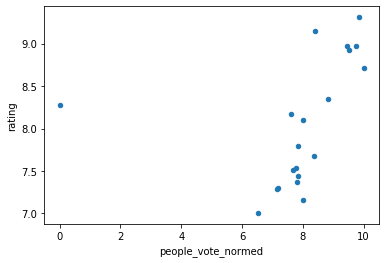

In [169]:
import numpy as np

# 8.To explore the connection between critic ratings and people votes, 
# plot them against each other in a scatter plot. What do you see?
movies.plot.scatter(x='people_vote_normed',y='rating')
'''here we can see weak correlation between critic ratings and people votes 
    and one outlier also became visible on the plot'''

In [170]:
#9. What is the correlation coefficient value when the outlier(s) is/are removed?
# detecting and removing the outlier(s)
Q1 = movies.quantile(0.25)
Q3 = movies.quantile(0.75)
IQR = Q3 - Q1
clean_movies = movies[~((movies < (Q1 - 1.5 * IQR)) |(movies > (Q3 + 1.5 * IQR))).any(axis=1)].copy()
clean_movies

,Unnamed: 0,people_vote,rating,people_vote_normed
0,0,60.000000,7.003429,6.521739
1,1,73.812940,8.102049,8.023146
2,2,87.096481,8.969485,9.467009
3,3,70.698214,7.506635,7.684588
4,4,71.963592,7.366683,7.822130
5,5,77.324780,9.145239,8.404867
6,6,66.217744,7.305087,7.197581
7,7,76.967948,7.676270,8.366081
8,8,71.544984,7.532199,7.776629
9,9,87.737301,8.919858,9.536663


In [171]:
#9.1 check the correlation coefficient value
print("The correlation coefficient of 'people_vote_normed' with 'rating' is {}\n".format(clean_movies['people_vote_normed'].corr(clean_movies['rating'])))
print("Here we can see highly positive correlation between 'people_vote' and ",'\n'
      "'raiting' when the outlier(s) is/are removed")
clean_movies.corr()

The correlation coefficient of 'people_vote_normed' with 'rating' is 0.8609465459222104

Here we can see highly positive correlation between 'people_vote' and  
'raiting' when the outlier(s) is/are removed


,Unnamed: 0,people_vote,rating,people_vote_normed
Unnamed: 0,1.000000,0.419287,0.283558,0.419287
people_vote,0.419287,1.000000,0.860947,1.000000
rating,0.283558,0.860947,1.000000,0.860947
people_vote_normed,0.419287,1.000000,0.860947,1.000000


'the highly positive correlation now is better visible on the plot '

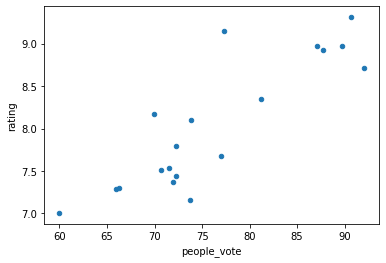

In [172]:
clean_movies.plot.scatter(x='people_vote',y='rating')
'''the highly positive correlation now is better visible on the plot '''

You've encountered an outlier - a data point so far from the others that keeping it may adversely affect results. 
Linear correlation is sensitive to distance. Handling outliers is important and most cases are harder than this one, due to dataset size (tens of thousands of movies) and complexity (hundreds of features). In this case a possible remedy would be to use order statistics or ranks (1st, 2nd,...).

$$
\small
X=\{100,0, 15, 50\}
\rightarrow
rank(X)=\{4, 1, 2, 3\}
$$

**Questions:**
10. Use the Pandas DataFrame function rank() to replace the features 'people_vote' and 'rating' with their ranks. Draw a scatterplot of the ranks of these two features against each other.
11. Calculate the correlation coefficient of the ranks of the two features.
12. The correlation coefficient on ranks is called the **Spearman correlation**. Try using the Pandas DataFrame function corr(method = 'spearman') and verify that it gives the same result as in question 11.

In [173]:
# 10.Use the Pandas DataFrame function rank() to replace the features 'people_vote' and 'rating' 
# with their ranks. Draw a scatterplot of the ranks of these two features against each other.
clean_movies["rank_vote"] = clean_movies["people_vote"].rank()
clean_movies["rank_rating"] = clean_movies["rating"].rank()
clean_movies

,Unnamed: 0,people_vote,rating,people_vote_normed,rank_vote,rank_rating
0,0,60.000000,7.003429,6.521739,1.0,1.0
1,1,73.812940,8.102049,8.023146,11.0,11.0
2,2,87.096481,8.969485,9.467009,15.0,16.0
3,3,70.698214,7.506635,7.684588,5.0,7.0
4,4,71.963592,7.366683,7.822130,7.0,5.0
5,5,77.324780,9.145239,8.404867,13.0,18.0
6,6,66.217744,7.305087,7.197581,3.0,4.0
7,7,76.967948,7.676270,8.366081,12.0,9.0
8,8,71.544984,7.532199,7.776629,6.0,8.0
9,9,87.737301,8.919858,9.536663,16.0,15.0


here we can see that plot of ranks  and movies real data columns are a little bit different 
but the highly positive correlation is visible on the both plots 


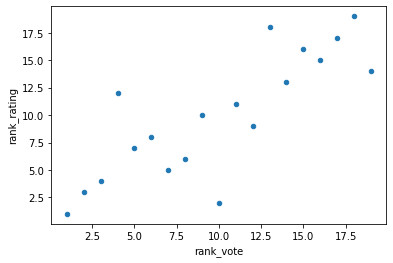

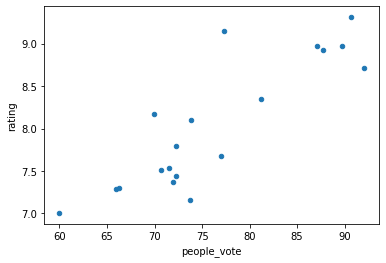

In [174]:
clean_movies.plot.scatter(x='rank_vote',y='rank_rating'), clean_movies.plot.scatter(x='people_vote',y='rating')
print("here we can see that plot of ranks  and movies real data columns are a little bit different","\n"
"but the highly positive correlation is visible on the both plots ")

In [175]:
#11.Calculate the correlation coefficient of the ranks of the two features.

corr_matrix = np.corrcoef(clean_movies['rank_vote'],clean_movies['rank_rating'])

print("The correlation coefficient of 'rank_vote' with 'rank_rating' is {}".
      format(corr_matrix[0,1]))
print('the highly positive correlation between these two features')



The correlation coefficient of 'rank_vote' with 'rank_rating' is 0.8157894736842105
the highly positive correlation between these two features


In [176]:
#12.The correlation coefficient on ranks is called the Spearman correlation. 
# Try using the Pandas DataFrame function corr(method = 'spearman') 
# and verify that it gives the same result as in question 11.

print("The correlation coefficient of 'rank_vote' with 'rank_rating' is {}".
      format(clean_movies['rank_vote'].corr(clean_movies['rank_rating'], method = 'spearman')))
print('the same result as in question 11.')


The correlation coefficient of 'rank_vote' with 'rank_rating' is 0.8157894736842105
the same result as in question 11.
